m = [1.93939394]
b = [4.73333333]


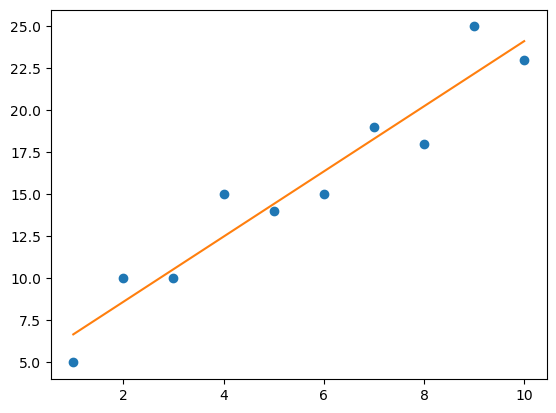

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LinearRegression().fit(X, Y)

m = model.coef_.flatten()
b = model.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

plt.plot(X, Y, 'o')
plt.plot(X, m * X + b)
plt.show()

m = [1.93939394]
b = [4.73333333]


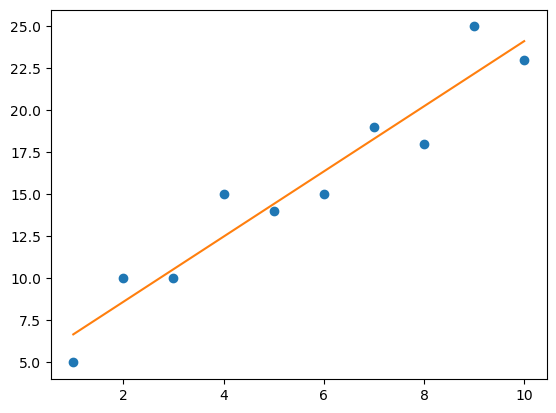

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

X = df[['x']]
Y = df['y']

model = LinearRegression().fit(X, Y)

m = model.coef_.flatten()
b = model.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

plt.plot(X, Y, 'o')
plt.plot(X, m * X + b)
plt.show()

In [3]:
import pandas as pd

points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

m = 1.93939
b = 4.73333

for p in points:
    y_actual = p.y
    y_predict = m * p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [4]:
import pandas as pd

points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

m = 1.93939
b = 4.73333

sum_of_squares = 0.0

for p in points:
    y_actual = p.y
    y_predict = m * p.x + b
    residual_squared = (y_predict - y_actual) ** 2
    sum_of_squares += residual_squared

print("제곱 합 = {}".format(sum_of_squares))

제곱 합 = 28.096969704500005


In [5]:
import pandas as pd

points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)
m = (n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (
        n * sum(p.x ** 2 for p in points) - sum(p.x for p in points) ** 2)
b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


In [6]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

X = df.values[:, :-1].flatten()
X_1 = np.vstack([X, np.ones(len(X))]).T
Y = df.values[:, -1]

beta = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(beta)

y_predict = X_1.dot(beta)

[1.93939394 4.73333333]


In [7]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

X = df.values[:, :-1].flatten()
X_1 = np.vstack([X, np.ones(len(X))]).transpose()
Y = df.values[:, -1]

Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[1.93939394 4.73333333]


In [8]:
import random


def f(x):
    return (x - 3) ** 2 + 4


def dx_f(x):
    return 2 * (x - 3)


L = 0.001
iterations = 100_000

x = random.randint(-15, 15)

for i in range(iterations):
    d_x = dx_f(x)
    x -= L * d_x

print(x, f(x))

3.000000000000111 4.0


In [9]:
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m = 0.0
b = 0.0

L = 0.001
iterations = 100_000

n = float(len(points))

for i in range(iterations):
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


In [10]:
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [11]:
import pandas as pd
from sympy import *

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n))
d_m = diff(sum_of_squares, m).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i:
points[i].y)
d_b = diff(sum_of_squares, b).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i:
points[i].y)

d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

m = 0.0
b = 0.0

L = 0.001
iterations = 100_000

for i in range(iterations):
    m -= d_m(m, b) * L
    b -= d_b(m, b) * L

print("y = {0}x + {1}".format(m, b))

y = 1.939393939393954x + 4.733333333333231


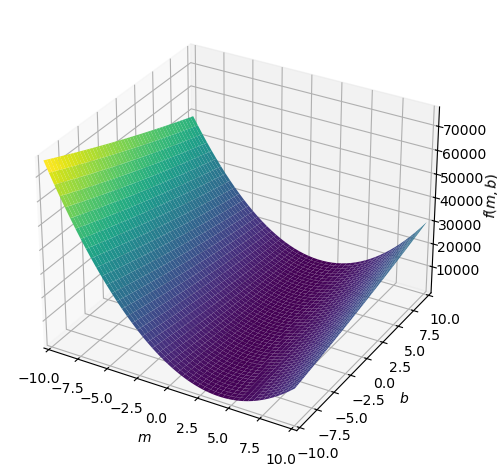

In [12]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n)).subs(n, len(points) - 1).doit().replace(x, lambda i: points[
    i].x).replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]

m = 0.0
b = 0.0

sample_size = 1
L = 0.0001
epochs = 1_000_000

for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    Y_pred = m * x_sample + b

    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m
    b = b - L * D_b

    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

0 0.046 0.0046
10000 2.3157570010900796 1.8732100528458429
20000 2.2144485790737605 2.830704635130361
30000 2.1276927054882258 3.4519725660575133
40000 2.0601952877665686 3.8802688888708663
50000 2.0437840085716745 4.17446730796843
60000 1.9659850864738742 4.357542679331424
70000 1.9753787924480946 4.490853140106559
80000 1.956119279506444 4.588833928892326
90000 1.9346129133041035 4.613850691620767
100000 1.948744977997834 4.664433149774258
110000 1.9364247031962678 4.701127834962596
120000 1.9618866781385644 4.725878507696936
130000 1.9502320811621578 4.718967502167883
140000 1.9249830213559957 4.736596112640185
150000 1.9127248393950924 4.734884871422151
160000 1.9212904285671932 4.7211465053665504
170000 1.9533588419615175 4.728872367486981
180000 1.9410838502460686 4.715006888208364
190000 1.928420035705758 4.717541575747917
200000 1.9573643308266664 4.726419799975006
210000 1.9519014700121422 4.725614865819896
220000 1.9346754700979147 4.722246518066125
230000 1.9328874035023813 

In [14]:
import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

correlations = df.corr()
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [15]:
import pandas as pd
from math import sqrt

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)
denominator = sqrt(n * sum(p.x ** 2 for p in points) - sum(p.x for p in points) ** 2) * sqrt(
    n * sum(p.y ** 2 for p in points) - sum(p.y for p in points) ** 2)

corr = numerator / denominator
print(corr)

0.9575860952087218


In [16]:
from scipy.stats import t

n = 10
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.262157162740991


In [17]:
from scipy.stats import t
from math import sqrt

n = 10

lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

r = 0.957586

test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("검정값: {}".format(test_value))
print("임계 범위: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("상관 관계가 입증되어 귀무 가설을 거부합니다")
else:
    print("상관 관계가 입증되지 않아 귀무 가설을 거부하지 못합니다")

if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

p_value = p_value * 2
print("P 값: {}".format(p_value))

검정값: 9.399564671312076
임계 범위: -2.262157162740992, 2.262157162740991
상관 관계가 입증되어 귀무 가설을 거부합니다
P 값: 5.9763860877914965e-06


In [18]:
import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

coeff_determination = df.corr() ** 2
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [19]:
import pandas as pd
from math import sqrt

points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = 1.939
b = 4.733

S_e = sqrt((sum((p.y - (m * p.x + b)) ** 2 for p in points)) / (n - 2))
print(S_e)

1.87406793500129


In [20]:
import pandas as pd
from scipy.stats import t
from math import sqrt

points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = 1.939
b = 4.733

x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))
margin_of_error = t_value * standard_error * sqrt(
    1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / (n * sum(p.x ** 2 for p in points) - sum(p.x for p in points) ** 2))

predicted_y = m * x_0 + b
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.462516875955465 25.966483124044537


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 / 3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f" % result)

r^2: 0.993


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: 평균=%.3f (표준편차-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: 평균=0.993 (표준편차-0.000)


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("평균=%.3f (표준편차-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
평균=0.769 (표준편차-0.208)


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

fit = LinearRegression().fit(X, Y)
print("계수 = {0}".format(fit.coef_))
print("절편 = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

계수 = [2.00672647 3.00203798]
절편 = 20.10943282003595
z = 20.10943282003595 + 2.006726472512807x + 3.0020379766466934y


m = [1.75919315]
b = [4.69359655]


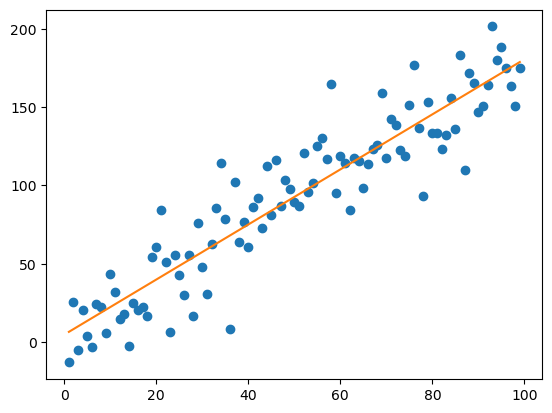

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

plt.plot(X, Y, 'o')
plt.plot(X, m * X + b)
plt.show()

In [26]:
import pandas as pd
from scipy.stats import t
from math import sqrt

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

correlations = df.corr(method='pearson')
print(correlations)

n = df.shape[0]
print(n)
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

r = correlations["y"]["x"]

test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("검정 값: {}".format(test_value))
print("임계 범위: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("상관 관계가 입증되어 귀무 가설을 거부합니다")
else:
    print("상관 관계가 입증되지 않아 귀무 가설을 거부하지 못합니다")

if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

p_value = p_value * 2
print("P 값: {}".format(p_value))

         x        y
x  1.00000  0.92421
y  0.92421  1.00000
99
검정 값: 23.835515323677363
임계 범위: -1.9844674544266925, 1.984467454426692
상관 관계가 입증되어 귀무 가설을 거부합니다
P 값: 0.0


In [27]:
import pandas as pd
from scipy.stats import t
from math import sqrt

points = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",").itertuples())

n = len(points)

m = 1.75919315
b = 4.69359655

x_0 = 50
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))
margin_of_error = t_value * standard_error * sqrt(
    1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / (n * sum(p.x ** 2 for p in points) - sum(p.x for p in points) ** 2))

predicted_y = m * x_0 + b
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

50.792086501055955 134.51442159894404


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: 평균=%.3f (표준 편차-%.3f)" % (results.mean(), results.std()))

[0.86119665 0.78237719 0.85733887]
MSE: 평균=0.834 (표준 편차-0.036)
